## pca technique assignment

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Win7Ult\Downloads\wine.csv")

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
#checking for presence of null values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
#normalization
from sklearn.preprocessing import normalize
norm=normalize(df)

In [6]:
norm

array([[9.32148040e-04, 1.32644666e-02, 1.59397315e-03, ...,
        9.69433961e-04, 3.65402032e-03, 9.92737662e-01],
       [9.47939004e-04, 1.25127948e-02, 1.68733143e-03, ...,
        9.95335954e-04, 3.22299261e-03, 9.95335954e-01],
       [8.40654226e-04, 1.10630096e-02, 1.98394397e-03, ...,
        8.65873852e-04, 2.66487390e-03, 9.96175257e-01],
       ...,
       [3.55447904e-03, 1.57226456e-02, 5.07105676e-03, ...,
        6.99047544e-04, 1.84832910e-03, 9.89329998e-01],
       [3.53384139e-03, 1.55135637e-02, 3.05088307e-03, ...,
        7.06768278e-04, 1.90827435e-03, 9.89475589e-01],
       [5.27254850e-03, 2.48337034e-02, 7.20581628e-03, ...,
        1.07208486e-03, 2.81202587e-03, 9.84209053e-01]])

In [7]:
#implementing pca for 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_values = pca.fit_transform(norm)

In [8]:
pca_values

array([[-3.74741199e-02,  8.64732432e-03, -7.35260971e-04],
       [-6.13314968e-02,  6.30153073e-03, -1.54529566e-03],
       [-6.98200861e-02, -5.97404730e-04, -1.83373620e-03],
       [-7.95010606e-02,  1.46806749e-03, -1.10380551e-03],
       [ 5.36715976e-03,  5.30764532e-03, -1.12888865e-03],
       [-7.88810985e-02,  2.56847480e-03, -1.37742407e-03],
       [-8.11984191e-02,  7.04290350e-04, -2.06028147e-03],
       [-6.26201479e-02,  3.72584281e-03, -1.84742611e-03],
       [-6.27733100e-02,  2.71431519e-03, -1.23458372e-03],
       [-6.14654771e-02,  1.26602596e-03, -5.45330223e-05],
       [-8.59536657e-02, -5.67716772e-04, -2.47153286e-03],
       [-8.10175251e-02, -8.56867742e-04, -2.26419792e-03],
       [-8.77714781e-02, -1.64213342e-03, -2.15283604e-03],
       [-7.67751841e-02,  2.65437872e-03, -1.57318433e-03],
       [-9.03352105e-02,  2.17811961e-03, -1.30705031e-03],
       [-7.02981244e-02,  2.04093528e-03, -6.18316151e-04],
       [-6.17845511e-02,  1.81168491e-03

In [9]:
#variance ratio
var = pca.explained_variance_ratio_
var

array([0.97699301, 0.01349697, 0.00463673])

In [10]:
#cumulative sums of the sequence
var1= np.cumsum(np.round(var,decimals = 4)*100)
var1

array([97.7 , 99.05, 99.51])

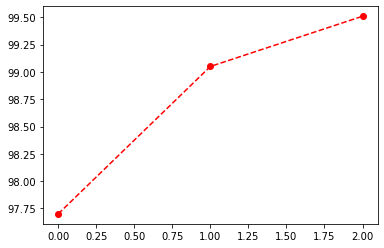

In [11]:
import matplotlib.pyplot as plt
plt.plot(var1,color="red",marker='o',linestyle='--')

In [12]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

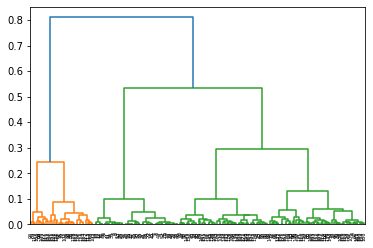

In [13]:
#dendogram


dendrogram = sch.dendrogram(sch.linkage(pca_values, method='ward'))

In [15]:
#hierarchical clustering
hc1= AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc1

AgglomerativeClustering(n_clusters=3)

In [16]:
#fitting the model to pca values
m=hc1.fit_predict(pca_values)

In [17]:
m

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [18]:
n=pd.DataFrame(m,columns=['h_Clusters_pca'])

In [19]:
n

,h_Clusters_pca
0,0
1,2
2,2
3,2
4,0
...,...
173,0
174,0
175,0
176,0


In [20]:
#kmeans
distortions = []
K = range(1,10)
for i in K:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(pca_values)
    distortions.append(kmeanModel.inertia_)

C:\Users\Win7Ult\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


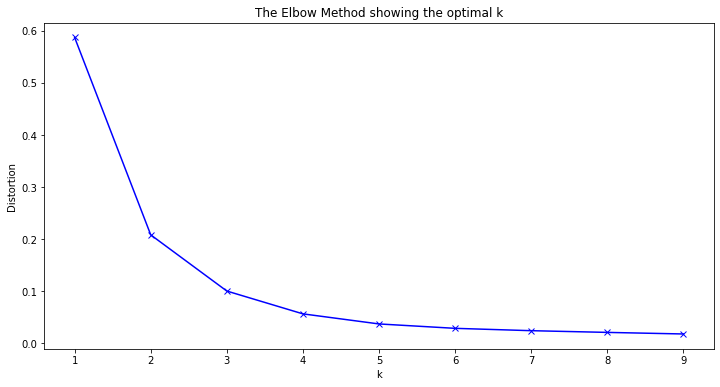

In [21]:
#elbow curve
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [22]:
#fitting the model to pca-values
p=KMeans(n_clusters=3)
l=p.fit_predict(pca_values)
l

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
#creating dataframe
q=pd.DataFrame(l,columns=['k_clusters_pca'])

In [24]:
r=pd.concat([df,n,q],axis=1)

In [25]:
r

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_Clusters_pca,k_clusters_pca
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,2
